In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [12]:
! pip install kaggle

In [13]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [17]:
! cp kaggle.json ~/.kaggle/

In [18]:
! chmod 600 ~/.kaggle/kaggle.json

In [19]:
! kaggle datasets download -d julian3833/jigsaw-toxic-comment-classification-challenge

 77% 41.0M/53.4M [00:00<00:00, 140MB/s]
100% 53.4M/53.4M [00:00<00:00, 107MB/s]


In [20]:
!unzip jigsaw-toxic-comment-classification-challenge.zip

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: test_labels.csv         
  inflating: train.csv               


In [23]:
train_data = pd.read_csv("train.csv", encoding='utf-8')
test_data = pd.read_csv('test.csv', encoding='utf-8')
test_labels = pd.read_csv('test_labels.csv')

In [24]:
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [26]:
test_data.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [27]:
test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [29]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [30]:
train_text = train_data['comment_text']
train_labels = train_data['toxic']

In [32]:
train_labels

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: toxic, Length: 159571, dtype: int64

In [33]:
train_text[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [35]:
train_text.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [36]:
vocab_size = 10000

In [37]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token='UNK')

In [38]:
tokenizer.fit_on_texts(train_text)

In [39]:
tokenizer.word_index

{'UNK': 1,
 'the': 2,
 'to': 3,
 'of': 4,
 'and': 5,
 'a': 6,
 'you': 7,
 'i': 8,
 'is': 9,
 'that': 10,
 'in': 11,
 'it': 12,
 'for': 13,
 'this': 14,
 'not': 15,
 'on': 16,
 'be': 17,
 'as': 18,
 'have': 19,
 'are': 20,
 'your': 21,
 'with': 22,
 'if': 23,
 'article': 24,
 'was': 25,
 'or': 26,
 'but': 27,
 'page': 28,
 'wikipedia': 29,
 'my': 30,
 'an': 31,
 'from': 32,
 'by': 33,
 'do': 34,
 'at': 35,
 'me': 36,
 'about': 37,
 'so': 38,
 'talk': 39,
 'what': 40,
 'can': 41,
 'there': 42,
 'all': 43,
 'has': 44,
 'will': 45,
 'please': 46,
 'no': 47,
 'would': 48,
 'one': 49,
 'like': 50,
 'just': 51,
 'they': 52,
 'he': 53,
 'which': 54,
 'any': 55,
 'been': 56,
 'should': 57,
 'more': 58,
 'we': 59,
 "don't": 60,
 'some': 61,
 'other': 62,
 'who': 63,
 'here': 64,
 'see': 65,
 'also': 66,
 'his': 67,
 'think': 68,
 'because': 69,
 'know': 70,
 'how': 71,
 'edit': 72,
 'am': 73,
 "i'm": 74,
 'people': 75,
 'why': 76,
 'up': 77,
 'only': 78,
 "it's": 79,
 'out': 80,
 'articles': 81,

In [40]:
y_labels = np.asarray(train_labels).astype('float32')

In [41]:
y_labels

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [43]:
x_train = tokenizer.texts_to_matrix(train_text, mode='binary')

In [44]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
from sklearn.model_selection import train_test_split

x_train = x_train[:30000]
y_labels = y_labels[:30000]

x_train, x_val, y_train, y_val = train_test_split(x_train, y_labels, test_size=0.33, random_state=42)

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(20100, 10000)
(20100,)
(9900, 10000)
(9900,)


# Model

In [49]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [52]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [53]:
history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
40/40 [==============================] - 5s 95ms/step - loss: 0.4455 - acc: 0.8684 - val_loss: 0.3283 - val_acc: 0.9049
Epoch 2/20
40/40 [==============================] - 3s 74ms/step - loss: 0.3080 - acc: 0.9018 - val_loss: 0.2847 - val_acc: 0.9108
Epoch 3/20
40/40 [==============================] - 2s 53ms/step - loss: 0.2450 - acc: 0.9213 - val_loss: 0.2171 - val_acc: 0.9384
Epoch 4/20
40/40 [==============================] - 2s 53ms/step - loss: 0.1592 - acc: 0.9544 - val_loss: 0.1703 - val_acc: 0.9461
Epoch 5/20
40/40 [==============================] - 2s 54ms/step - loss: 0.1012 - acc: 0.9691 - val_loss: 0.1663 - val_acc: 0.9487
Epoch 6/20
40/40 [==============================] - 2s 55ms/step - loss: 0.0672 - acc: 0.9803 - val_loss: 0.1706 - val_acc: 0.9516
Epoch 7/20
40/40 [==============================] - 4s 99ms/step - loss: 0.0479 - acc: 0.9865 - val_loss: 0.1789 - val_acc: 0.9515
Epoch 8/20
40/40 [==============================] - 3s 82ms/step - loss: 0.0354 - a

In [54]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

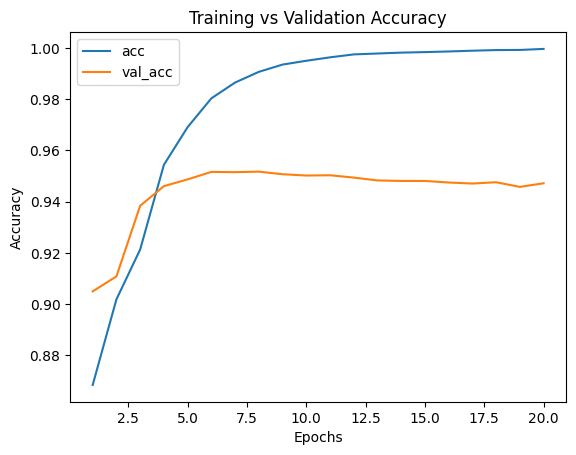

In [55]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='acc')
plt.plot(epochs, val_acc, label='val_acc')

plt.legend()
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

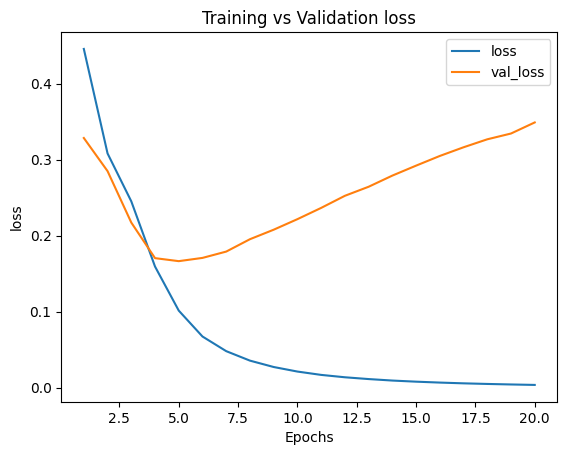

In [56]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')

plt.legend()
plt.title('Training vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()